In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("car_acceptability.csv")
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5,5,med,med,good
1723,low,low,5,5,med,high,vgood
1724,low,low,5,5,big,low,unacc
1725,low,low,5,5,big,med,good


In [7]:
df.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
lug_boot             0
safety               0
evaluation           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [15]:
df["evaluation"].value_counts()

evaluation
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [19]:
l=LabelEncoder()
df["buying price"]=l.fit_transform(df["buying price"])
df["maintenance cost"]=l.fit_transform(df["maintenance cost"])
df["lug_boot"]=l.fit_transform(df["lug_boot"])
df["safety"]=l.fit_transform(df["safety"])

In [21]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,evaluation
0,3,3,2,2,2,2,unacc
1,3,3,2,2,2,0,unacc
2,3,3,2,2,1,1,unacc
3,3,3,2,2,1,2,unacc
4,3,3,2,2,1,0,unacc
...,...,...,...,...,...,...,...
1722,1,1,5,5,1,2,good
1723,1,1,5,5,1,0,vgood
1724,1,1,5,5,0,1,unacc
1725,1,1,5,5,0,2,good


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
x=df.drop("evaluation",axis=1)
y=df["evaluation"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## RANDOM FOREST CODE

In [40]:
rtree=RandomForestClassifier(n_estimators=10,random_state=42)
rtree.fit(x_train,y_train)
y_pred=rtree.predict(x_test)

In [73]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.838150289017341


In [75]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("\n Confusion matrix: \n",conf_matrix)


 Confusion matrix: 
 [[ 50   0  26   1]
 [  6   4   2   3]
 [ 13   0 224   0]
 [  4   0   1  12]]


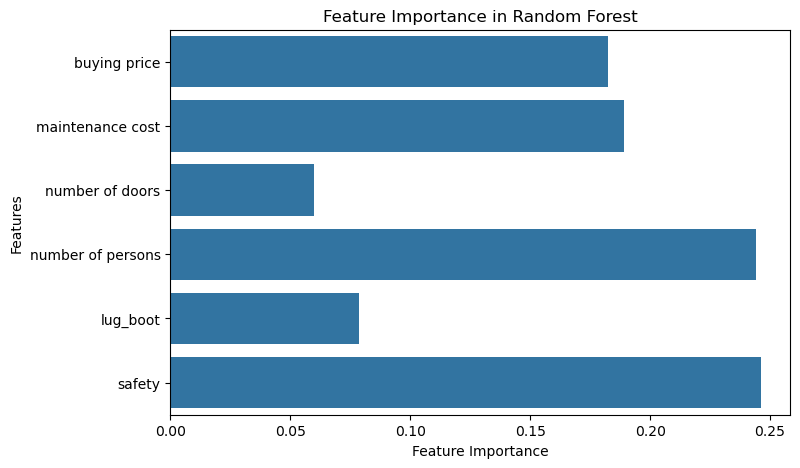

In [77]:
feature_importance = pd.Series(rtree.feature_importances_, index=x.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()